In [33]:
import matplotlib.pyplot as plt
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker


log_data_base_dir="/mnt/nvme2/xuhaiyang/szz/DPBloom_filter/log_data"

target_key = "random"
target_key = "inside"
# target_key = "outside"

target_key_mapping = {
    "random" : "Random",
    "inside" : "True_Negative",
    "outside" : "False_Positive"
}

title_mapping = {
    "random" : "Total Error",
    "inside" : "True Negative Error",
    "outside" : "False Positive Error"
}

log2m_values = [19, 20, 21, 22, 23]

# n_values = ["1e3", "1e4", "1e5", "1e6", "1e7"]
n_values = ["1e1", "1e2", "1e3", "1e4", "1e5"]
# k_values = [2, 4, 8, 16, 32]
k_values = [1, 2, 4, 8, 16]

eps_0_values = [0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]

# name="diff_m"
# lengend_name = "logm"
# key_list = log2m_values

# name="diff_k"
# lengend_name="k"
# key_list = k_values

name="diff_na"
lengend_name="|A|"
key_list = n_values


font_size = 20
line_width=3.0
# marker_size=11
color_list = ["#ffc470", "#f6a865", "#ee8d5b", "#e57250", "#dd5746"]
marker_list = ["o", "D", "^", "p", "X"]
line_style_dict = {
    "solid" : "solid",
    "dotted" : "dotted",
    "dashed" : "dashed",
    "dashdot" : "dashdot",
    'long dash with offset': (5, (10, 3)), 
    'dashdotted' : (0, (3, 5, 1, 5)),
}
line_style_list = ["solid", "dotted", "dashed", 'dashdotted', 'long dash with offset']


def gen_single_pdf(target_key):

    log2m=19
    # log2m=20
    n="1e5"
    # k=8
    k=4
    N = 5

    save_file_name=f"eps_{name}_{target_key_mapping[target_key]}.pdf"
    title_name = f"{title_mapping[target_key]} with {name.replace('_', ' ').replace('na', '|A|')}"


    log_data_dir=os.path.join(log_data_base_dir, name)

    diff_value2list_dict = {}

    # key_list = n_values
    # for n in n_values:
    #     dict_key = n

    for dict_key in key_list:

        if name == "diff_k":
            k = dict_key
        elif name == "diff_m":
            log2m = dict_key
        elif name == "diff_na":
            n = dict_key

        value_list = []
        # for i in range(11):
        #     eps_0 = i * 0.3
        for eps_0 in eps_0_values:
            file_name = f"log2m_{log2m}_n_{n}_k_{k}_eps0_{eps_0}.json"
            file_path = os.path.join(log_data_dir, file_name)
            with open(file_path, 'r') as fr:
                data = json.load(fr)
                value_list.append(data[target_key])
        # post process value list
        value_list = [value / 100 for value in value_list]
        # value_list = [(1 - value / 100) for value in value_list]
        diff_value2list_dict[dict_key] = value_list


    # create a new figure
    plt.figure()
    # get current axis
    ax = plt.gca()
    # turn background into lightgrey
    ax.set_facecolor('#f0f0f0')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

    # cut_off = 10

    # x_data = list(range(21))
    # x_data = [i * 5 for i in range(21)]
    # x_data = x_data[:cut_off]
    # x_data = [i * 0.3 for i in range(11)]
    x_data = [eps_0 * N for eps_0 in eps_0_values]
    for i, key in enumerate(key_list):
        y_data = diff_value2list_dict[key]
        # y_data = y_data[:cut_off]
        plt.plot(x_data, y_data, label=f"{lengend_name}={key}", marker=marker_list[i], color=color_list[i], linewidth=line_width, markersize=9, markerfacecolor="None",
            markeredgecolor=color_list[i], markeredgewidth=2, linestyle=line_style_dict[line_style_list[i]])

    plt.grid(True)  # show grid
    # add legend
    # plt.legend(fontsize=font_size, loc='upper right')
    plt.legend(fontsize=font_size)

    # add title and labels for x and y
    plt.title(title_name, fontsize=font_size, fontweight='bold')
    plt.xlabel('Epsilon', fontsize=font_size, fontweight='bold')
    plt.ylabel('Error Rate', fontsize=font_size, fontweight='bold')

    plt.minorticks_on()

    # set stick font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # # # show fig
    # plt.show()

    save_fig_path = os.path.join("eps_figs", save_file_name)
    print(save_fig_path)
    plt.savefig(save_fig_path, format='pdf', bbox_inches='tight', pad_inches=0.05)

    # clean up plt
    plt.clf()


target_key_values = ["random", "inside", "outside"]
for target_key in target_key_values:
    gen_single_pdf(target_key)


eps_figs/eps_diff_na_Random.pdf
eps_figs/eps_diff_na_True_Negative.pdf
eps_figs/eps_diff_na_False_Positive.pdf


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
# for i in range(11):
#     eps_0 = i * 0.3
#     print(f"{eps_0:f1}")

ValueError: Invalid format specifier

In [17]:
import matplotlib.pyplot as plt
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker


log_data_base_dir="/mnt/nvme2/xuhaiyang/szz/DPBloom_filter/log_data"

target_key_mapping = {
    "random" : "Random",
    "inside" : "True_Negative",
    "outside" : "False_Positive"
}

title_mapping = {
    "random" : "Total Error",
    "inside" : "True Negative Error",
    "outside" : "False Positive Error"
}

log2m_values = [20, 21, 22, 23, 24]
# n_values = ["1e3", "1e4", "1e5", "1e6", "1e7"]
n_values = ["1e1", "1e2", "1e3", "1e4", "1e5"]
# k_values = [2, 4, 8, 16, 32]
k_values = [1, 2, 4, 8, 16]

name="diff_m"
lengend_name = "logm"
key_list = log2m_values

# name="diff_k"
# lengend_name="k"
# key_list = k_values

name="diff_n"
lengend_name="|A|"
key_list = n_values



def gen_single_pdf(target_key):

    save_file_name=f"{name}_{target_key_mapping[target_key]}"
    title_name = f"{title_mapping[target_key]} with {name.replace('_', ' ').replace('n', '|A|')}"

    log_data_dir=os.path.join(log_data_base_dir, name)

    diff_value2list_dict = {}

    log2m=20
    n="1e5"
    k=8

    for dict_key in key_list:

        value_list = []
        for eps_0 in range(21):

            if name == "diff_k":
                k = dict_key
            elif name == "diff_m":
                log2m = dict_key
            elif name == "diff_n":
                n = dict_key

            file_name = f"log2m_{log2m}_n_{n}_k_{k}_eps0_{eps_0}.json"
            # print(file_name)
            file_path = os.path.join(log_data_dir, file_name)
            # print(file_path)
            with open(file_path, 'r') as fr:
                data = json.load(fr)
                value_list.append(data[target_key])
        # post process value list
        value_list = [value / 100 for value in value_list]
        diff_value2list_dict[dict_key] = value_list

    font_size = 20
    line_width=5.0
    marker_size=13
    color_list = ["#ffc470", "#f6a865", "#ee8d5b", "#e57250", "#dd5746"]
    # color_list = [
    # "#ff0000",
    # "#c80d17",
    # "#921a2e",
    # "#5c2745",
    # "#26355d",
    # ]
    marker_list = ["o", "D", "^", "p", "X"]

    # create a new figure
    plt.figure()
    # get current axis
    ax = plt.gca()
    # turn background into lightgrey
    ax.set_facecolor('#f0f0f0')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

    x_data = list(range(21))
    for i, key in enumerate(key_list):
        y_data = diff_value2list_dict[key]
        plt.plot(x_data, y_data, label=f"{lengend_name}={key}", marker=marker_list[i], color=color_list[i], linewidth=line_width, markersize=marker_size)

    plt.grid(True)  # show grid
    # add legend
    plt.legend(fontsize=font_size, loc='upper right')

    # add title and labels for x and y
    plt.title(title_name, fontsize=font_size)
    plt.xlabel('Epsilon_0', fontsize=font_size)
    plt.ylabel('Error Rate', fontsize=font_size)

    # set stick font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # # show fig
    # plt.show()

    save_fig_path = os.path.join("pdfs", f"{save_file_name}.pdf")
    print(save_fig_path)
    plt.savefig(save_fig_path, format='pdf', bbox_inches='tight', pad_inches=0.05)

    # clean up plt
    plt.clf()


# target_key = "random"
# target_key = "inside"
# target_key = "outside"

target_key_values = ["random", "inside", "outside"]
for target_key in target_key_values:
    gen_single_pdf(target_key)


pdfs/diff_n_Random.pdf
pdfs/diff_n_True_Negative.pdf
pdfs/diff_n_False_Positive.pdf


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

(255, 0, 0)
(200, 13, 23)
(146, 26, 46)
(92, 39, 69)
(38, 53, 93)


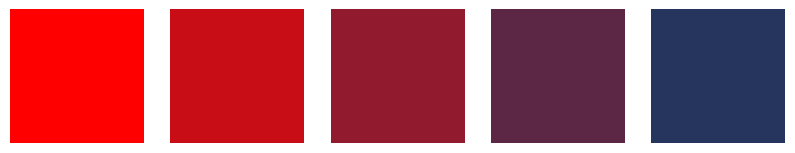

In [2]:
import matplotlib.pyplot as plt

def hex_to_rgb(hex_color):
    """Convert hex color to RGB."""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def interpolate_colors(start_color, end_color, steps):
    """Interpolate between two colors."""
    # Convert hex colors to RGB
    start_rgb = hex_to_rgb(start_color)
    end_rgb = hex_to_rgb(end_color)

    # Calculate the interpolation steps for each channel
    r_steps = (end_rgb[0] - start_rgb[0]) / (steps - 1)
    g_steps = (end_rgb[1] - start_rgb[1]) / (steps - 1)
    b_steps = (end_rgb[2] - start_rgb[2]) / (steps - 1)

    # Generate the interpolated colors
    interpolated_colors = []
    for i in range(steps):
        interpolated_r = start_rgb[0] + r_steps * i
        interpolated_g = start_rgb[1] + g_steps * i
        interpolated_b = start_rgb[2] + b_steps * i
        interpolated_colors.append((int(interpolated_r), int(interpolated_g), int(interpolated_b)))

    return interpolated_colors

# Initial and final hex colors
start_hex = "#FF0000"
# end_hex = "#FFC470"
end_hex = "#26355D"
# Number of interpolation steps
steps = 5

# Get the interpolated colors
interpolated_colors = interpolate_colors(start_hex, end_hex, steps)

# Visualize the colors using matplotlib
plt.figure(figsize=(10, 2))
for i, color in enumerate(interpolated_colors, start=1):
    plt.subplot(1, steps, i)  # 1 row, 'steps' columns, the 'i'-th subplot
    print(color)
    plt.imshow([[color]])  # Display a single color patch
    plt.axis('off')  # Turn off axis

plt.show()


In [4]:
def rgb_to_hex(rgb):
    hex = '#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2])
    return hex

for color in interpolated_colors:
    hex_color = rgb_to_hex(color)
    print(f'"{hex_color}",')
    # print(rgb_to_hex(color))

"#ff0000",
"#c80d17",
"#921a2e",
"#5c2745",
"#26355d",
